In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# Timeline

In [4]:
_ = (
    pd.read_csv(
        'rehydrated_tweets_count_by_day.csv',
        parse_dates=['day'],
        index_col=['day', 'lang']
   )
    ['count']
    .unstack('lang', fill_value=0)
)

_['total'] = _.sum(axis=1)
_ = _[['lv', 'ru', 'en', 'total']]

timeline = _

In [5]:
timeline.head()

lang,lv,ru,en,total
day,,,,
2017-04-15,1309,263,137,1853
2017-04-16,1465,285,194,2158
2017-04-17,1358,266,178,1968
2017-04-18,2776,352,309,3626
2017-04-19,3146,452,307,4132


In [9]:
'Average tweet number per day: {:.0f}'.format(timeline['total'].mean())

'Average tweet number per day: 3209'

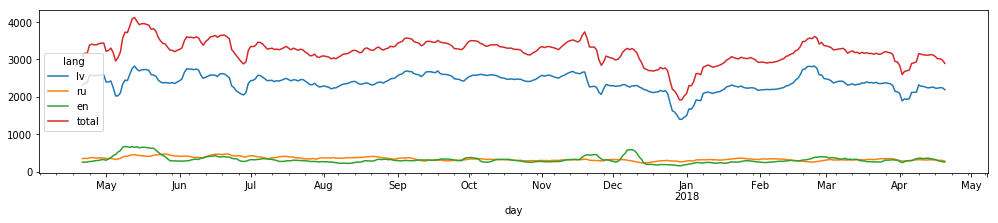

In [10]:
_ = timeline.rolling(window=7).mean().plot(figsize=(17, 3))

_.figure.savefig('rehydrated_tweets_count_by_day.pdf')

# Source statistics

In [25]:
sources = (
    pd.read_csv(
        'rehydrated_tweets_source_counts.csv',
        index_col=['source_pretty'],
        usecols=['source_pretty', 'total_count', 'total_share', 'tracked_source_share'],
    )
    .drop_duplicates()
)

In [29]:
sources

,total_count,total_share,tracked_source_share
source_pretty,,,
Twitter Web Client,409397,34.4%,52.0%
Twitter for Android,195537,16.4%,8.5%
Twitter for iPhone,177404,14.9%,13.6%
TweetDeck,91906,7.7%,91.6%
TVNET Login,48938,4.1%,96.7%
dlvr.it,39193,3.3%,98.4%
Facebook,31166,2.6%,95.1%
Foursquare,29121,2.4%,0.0%
Instagram,23082,1.9%,1.8%


In [28]:
sources.to_latex('figures/rehydrated_tweets_source_counts.tex')

# Language usage 

In [ ]:
_ = pd.read_csv('rehydrated_tweets_lang_usage.csv', index_col='rnum')

_['Language Uniformity Score'] = (_[['lv', 'ru', 'en']].max(axis=1) / _[['lv', 'ru', 'en']].sum(axis=1)).round(2)

lang_usage = _

In [ ]:
_ = lang_usage['Language Uniformity Score'].plot.hist(bins=6, figsize=(8, 3))

_.set(xlabel="Language uniformity score", ylabel="Users")
_.figure.tight_layout()

_.figure.savefig('rehydrated_tweets_lang_usage.pdf')

In [ ]:
lang_usage.sort_values('Language Uniformity Score').head()

# Language preference

## Monolingual

In [ ]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] == 0).sum(axis='columns') == 2
    ]
    [['lv', 'ru', 'en']] > 0
).sum(axis='rows')

## Multilingual

In [ ]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] > 0).sum(axis='columns') > 1
    ]
    [['lv', 'ru', 'en']]
    .replace(0, np.nan)
    .rank(axis='columns', method='min', ascending=False)
    .apply(lambda c: c.value_counts(), axis='rows')
)

# Topics

In [ ]:
relevance_judgments_count_by_day = (
    pd.read_csv(
        'relevance_judgments_count_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )['count']
    .unstack('topic_id', fill_value=0)
)

In [ ]:
(
    relevance_judgments_count_by_day[['LV001', 'LV005', 'LV006', 'LV007', 'LV008']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

In [ ]:
(
    relevance_judgments_count_by_day[['LV002', 'LV003', 'LV004', 'LV009']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

In [ ]:
_ = (
    pd.read_csv(
        'relevance_judgments_lang_pref_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )
)

_.columns = pd.MultiIndex.from_tuples(
    [
        ('Counts', 'Total'),
        ('Counts', 'lv, ru, en'),

        ('Tweets', 'lv'),
        ('Tweets', 'ru'),
        ('Tweets', 'en'),

        ('Users', 'lv'),
        ('Users', 'ru'),
        ('Users', 'en'),
    ],
    names=['Type', 'Language']
)
relevance_judgments_lang_pref_by_day = _

In [ ]:
relevance_judgments_lang_pref_by_day.head()

In [ ]:
_ = relevance_judgments_lang_pref_by_day[['Tweets', 'Users']].stack().reset_index(['topic_id', 'Language'])

sns.lmplot(
    x='Tweets', y='Users',
    hue='Language', hue_order=['lv', 'ru', 'en'],
    col='topic_id', col_wrap=3,
    data=_,
    ci=None,
);

In [ ]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV001'), :].reset_index('topic_id')

(
    _['Tweets']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 3))
);

In [ ]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV001'), :].reset_index('topic_id')

(
    _['Users']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 3))
);

## Topics 2

In [ ]:
_ = pd.read_csv(
    'relevance_judgments_lang_pref.csv',
    index_col=['topic_id', 'day'],
)[['r_lv', 'r_ru', 'r_en']]


_.columns = ['lv', 'ru', 'en']

relevance_judgments_lang_pref = _

In [ ]:
relevance_judgments_lang_pref.loc[['LV005']].head()

### Topics 3

In [ ]:
relevance_judgments_count_by_day.divide?

In [ ]:
_ = pd.read_csv(
    'relevance_judgments_lang_pref_by_user.csv',
    index_col=['topic_id', 'rnum'],
)

_.columns = pd.MultiIndex.from_tuples(
    [
        ('User', 'lv'),
        ('User', 'ru'),
        ('User', 'en'),
        ('User', 'total'),

        ('Topic', 'lv'),
        ('Topic', 'ru'),
        ('Topic', 'en'),
        ('Topic', 'total'),

    ],
    names=['Type', 'Language']
)

_ = _.stack('Type')
_ = _[['lv', 'ru', 'en']].divide(_['total'], axis='rows').round(2)

# _ = _.unstack('Type').stack('Language')
# _.reset_index(['Language', 'topic_id'], inplace=True, keep=True)

_ = _.unstack('Type')

_.columns = ['t_lv', 'u_lv', 't_ru', 'u_ru', 't_en', 'u_en']

relevance_judgments_lang_pref_by_user = _#[['u_lv', 'u_ru', 'u_en', 't_lv', 't_ru', 't_en']]

_.head()

In [ ]:
for topic in (
    'LV001',
    'LV003',
    'LV005',
    'LV006', 'LV007', 'LV008', 'LV009'
):

    g = sns.pairplot(
        x_vars=[
            'u_lv', 'u_ru', 'u_en'
        ],
        y_vars=[
            't_lv', 't_ru', 't_en'
        ],
        data=relevance_judgments_lang_pref_by_user.loc[topic].replace({0: np.nan, 1: np.nan}),
        kind='scatter',
    )
    
    g.fig.suptitle(topic)
    g.fig.savefig(f'lang_perf_by_user_{topic}.pdf')